In [2]:
import pandas as pd

In [3]:


users = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/UsersWithSentimentAndCountry.csv")
users.columns

Index(['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate',
       'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes',
       'AccountId', 'LocationCountry', 'SentimentLabel', 'SentimentScore',
       'SentimentValue'],
      dtype='object')

In [9]:
df = users[["Reputation", "SentimentScore","SentimentLabel"]].dropna()

In [5]:
df.describe()



,Reputation,SentimentScore
count,57411.000000,57411.000000
mean,228.339534,0.752532
std,2929.929113,0.138968
min,1.000000,0.346340
25%,1.000000,0.645830
50%,101.000000,0.772902
75%,101.000000,0.867626
max,355118.000000,0.992933


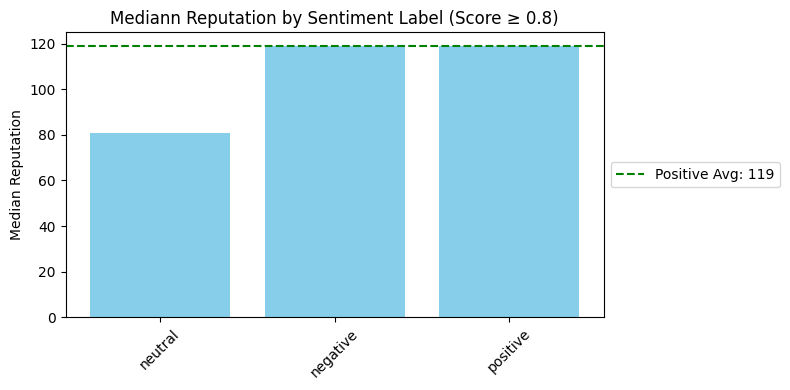

SentimentLabel
positive    832
negative     28
neutral       9
Name: count, dtype: int64
                       mean  median  count
SentimentLabel                            
neutral         1522.333333    81.0      9
negative        1057.250000   119.0     28
positive         358.421875   119.0    832


In [51]:
import matplotlib.pyplot as plt

# Filter by sentiment score threshold
df_filtered = df_filtered = df[
    (df["SentimentScore"] >= 0.95) & 
    (df["Reputation"] > 1) & 
    (df["Reputation"] != 101)
].copy()

# Group by SentimentLabel
grouped = df_filtered.groupby("SentimentLabel")["Reputation"].agg(["mean", "median", "count"]).sort_values("median")

# Plot
plt.figure(figsize=(8, 4))
plt.bar(grouped.index, grouped["median"], color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Median Reputation")
plt.title("Mediann Reputation by Sentiment Label (Score ≥ 0.8)")

# Draw horizontal line at positive sentiment's average
positive_mean = grouped.loc["positive", "median"]
plt.axhline(y=positive_mean, color="green", linestyle="--", label=f"Positive Avg: {positive_mean:.0f}")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

print(df_filtered["SentimentLabel"].value_counts())
print(grouped)



                      mean  median  count
SentimentLabel                           
negative        499.512586   101.0    437
neutral         351.754122   101.0   9159
positive        310.919258   101.0   6688


/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_14897/2026657752.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="SentimentLabel", y="Reputation", palette="pastel")


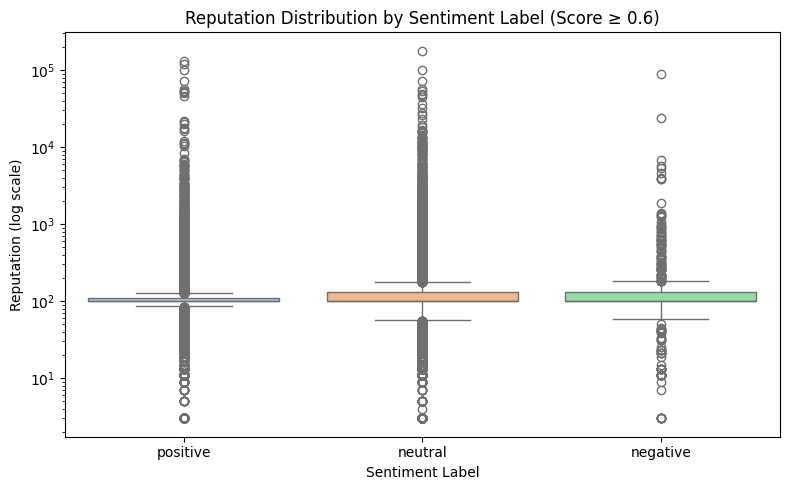

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to only include users with sentiment score ≥ 0.6
df_filtered = df[(df["SentimentScore"] >= 0.8) & (df["Reputation"] > 1)].copy()
df_filtered["Reputation"].value_counts().sort_index().tail(20)


# Group and summarize
summary = df_filtered.groupby("SentimentLabel")["Reputation"].agg(["mean", "median", "count"]).sort_values("median")
print(summary)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x="SentimentLabel", y="Reputation", palette="pastel")
plt.yscale("log")  # reputation is skewed
plt.title("Reputation Distribution by Sentiment Label (Score ≥ 0.6)")
plt.xlabel("Sentiment Label")
plt.ylabel("Reputation (log scale)")
plt.tight_layout()
plt.show()



User-level summary:
                      mean  median  count
SentimentLabel                          
neutral         13.112071     2.0   5211
positive        14.555996     2.0   3027
negative        27.396000     2.0    250

Post-level summary:
                     mean  median  count
SentimentLabel                         
neutral         1.801902     1.0  65412
negative        2.220830     1.0   1277
positive        2.980465     1.0   2150


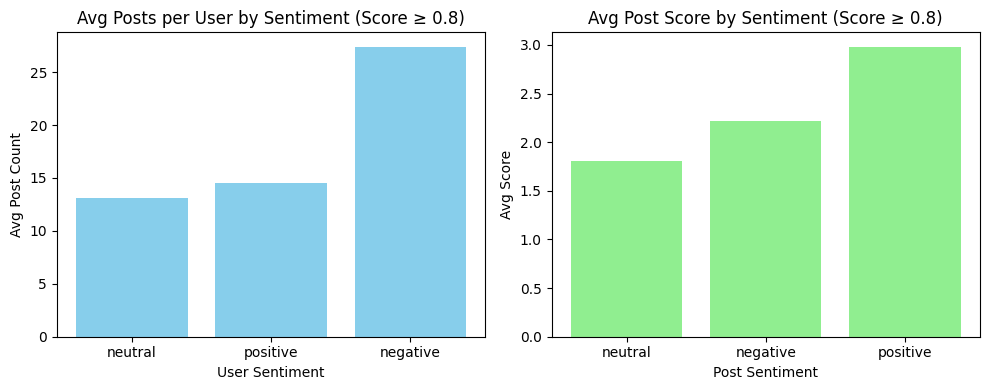

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load files
users = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/UsersWithSentimentAndCountry.csv")
posts = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Posts_with_sentiment.csv")

# --- USER-LEVEL ANALYSIS ---

# Count posts per user
user_post_counts = posts["OwnerUserId"].value_counts().rename("PostCount")

# Merge with user sentiment
user_df = users[["Id", "SentimentLabel", "SentimentScore"]].join(user_post_counts, on="Id").dropna()

# Only use users with confident sentiment
user_df = user_df[user_df["SentimentScore"] >= 0.8]

# Group by sentiment
user_summary = user_df.groupby("SentimentLabel")["PostCount"].agg(["mean", "median", "count"]).sort_values("mean")
print("User-level summary:\n", user_summary)

# --- POST-LEVEL ANALYSIS ---

# Filter to confident post sentiment
post_df = posts[posts["SentimentScore"] >= 0.8].copy()

# Group by sentiment
post_summary = post_df.groupby("SentimentLabel")["Score"].agg(["mean", "median", "count"]).sort_values("mean")
print("\nPost-level summary:\n", post_summary)

# --- PLOTTING ---

plt.figure(figsize=(10, 4))

# Left plot: Avg posts per user by sentiment
plt.subplot(1, 2, 1)
plt.bar(user_summary.index, user_summary["mean"], color="skyblue")
plt.title("Avg Posts per User by Sentiment (Score ≥ 0.8)")
plt.ylabel("Avg Post Count")
plt.xlabel("User Sentiment")

# Right plot: Avg post score by sentiment
plt.subplot(1, 2, 2)
plt.bar(post_summary.index, post_summary["mean"], color="lightgreen")
plt.title("Avg Post Score by Sentiment (Score ≥ 0.8)")
plt.ylabel("Avg Score")
plt.xlabel("Post Sentiment")

plt.tight_layout()
plt.show()


                        mean  median  count
SentimentLabel                             
negative        15008.556306   375.5    444
neutral         11910.359945   467.0  23887
positive         8830.233232   973.5   1312


/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_14897/1947941267.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged, x="SentimentLabel", y="Reputation", palette="pastel")


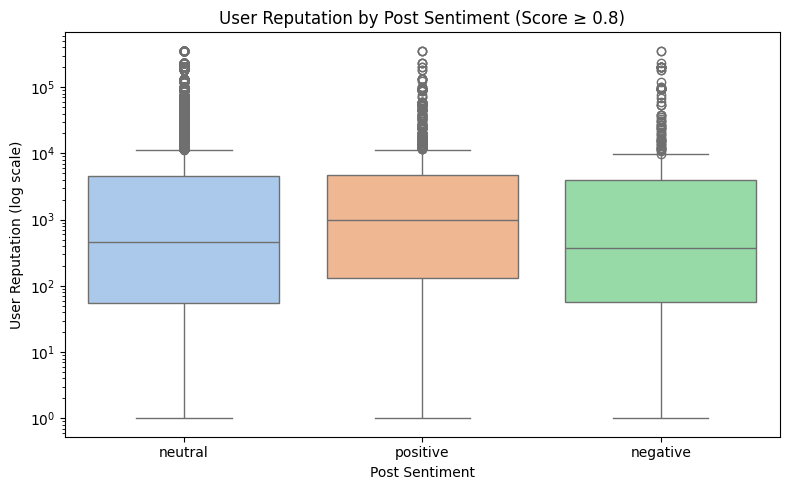

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
users = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/UsersWithSentimentAndCountry.csv")
posts = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Posts_with_sentiment.csv")


# Filter for posts with confident sentiment
posts = posts[posts["SentimentScore"] >= 0.85]

# Merge post sentiment with user reputation
merged = posts.merge(
    users[["Id", "Reputation"]],
    how="left",
    left_on="OwnerUserId",
    right_on="Id"
)

# Drop missing or invalid reputations
merged = merged.dropna(subset=["Reputation"])

# Group by post sentiment label
grouped = merged.groupby("SentimentLabel")["Reputation"].agg(["mean", "median", "count"]).sort_values("median")
print(grouped)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x="SentimentLabel", y="Reputation", palette="pastel")
plt.yscale("log")
plt.title("User Reputation by Post Sentiment (Score ≥ 0.8)")
plt.xlabel("Post Sentiment")
plt.ylabel("User Reputation (log scale)")
plt.tight_layout()
plt.show()


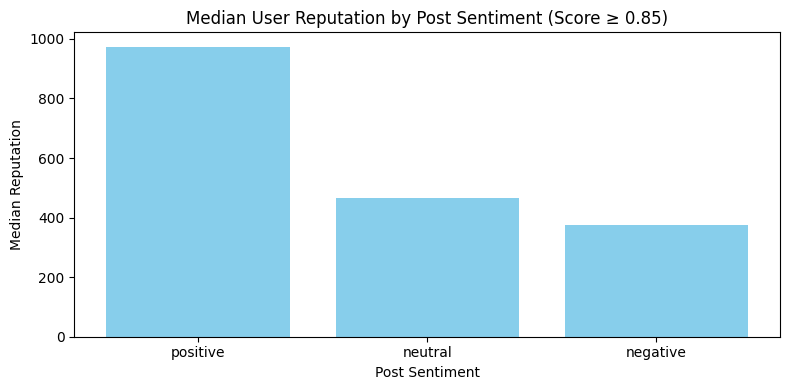

In [66]:
# Bar chart: average reputation by post sentiment
order = ["positive", "neutral", "negative"]  # or any order you want
grouped_sorted = grouped.reindex(order)

plt.figure(figsize=(8, 4))
plt.bar(grouped_sorted.index, grouped_sorted["median"], color="skyblue")
plt.title("Median User Reputation by Post Sentiment (Score ≥ 0.85)")
plt.ylabel("Median Reputation")
plt.xlabel("Post Sentiment")
plt.tight_layout()
plt.show()
